In [11]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


In [3]:
# Load dataset (relative path for GitHub)
df = pd.read_csv('/content/EEG_Eye_State_Classification.csv')

In [4]:
# Basic info
print(df.info())
print("\nUnique values per column:")
for col in df.columns:
    print(col, ":", df[col].nunique())

print("\nMissing values:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14980 entries, 0 to 14979
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AF3           14980 non-null  float64
 1   F7            14980 non-null  float64
 2   F3            14980 non-null  float64
 3   FC5           14980 non-null  float64
 4   T7            14980 non-null  float64
 5   P7            14980 non-null  float64
 6   O1            14980 non-null  float64
 7   O2            14980 non-null  float64
 8   P8            14980 non-null  float64
 9   T8            14980 non-null  float64
 10  FC6           14980 non-null  float64
 11  F4            14980 non-null  float64
 12  F8            14980 non-null  float64
 13  AF4           14980 non-null  float64
 14  eyeDetection  14980 non-null  int64  
dtypes: float64(14), int64(1)
memory usage: 1.7 MB
None

Unique values per column:
AF3 : 548
F7 : 452
F3 : 345
FC5 : 312
T7 : 285
P7 : 330
O1 : 290
O2 : 294
P8 

In [5]:
# Features and target
X = df.drop("eyeDetection", axis=1)
y = df["eyeDetection"]


In [6]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=39, stratify=y
)


In [7]:
# Model
model = RandomForestClassifier(
    n_estimators=400,
    max_depth=30,
    oob_score=True,
    random_state=39,
    n_jobs=-1
)

In [8]:
# Train
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, n_estimators=400, n_jobs=-1,
                       oob_score=True, random_state=39)

In [9]:
# Predict
y_pred = model.predict(X_test)

In [10]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred)

print("\nModel Accuracy:", accuracy)
print("\nClassification Report:")
print((y_test, y_pred))


Model Accuracy: 0.9352469959946595

Classification Report:
(13143    0
2109     0
6684     1
3107     0
2571     1
        ..
6519     0
9699     0
13895    0
7648     1
6277     0
Name: eyeDetection, Length: 2996, dtype: int64, array([0, 0, 1, ..., 0, 1, 0]))


In [12]:
# Get feature importance values
importances = model.feature_importances_
features = X.columns


In [13]:
# Create DataFrame
fi_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)



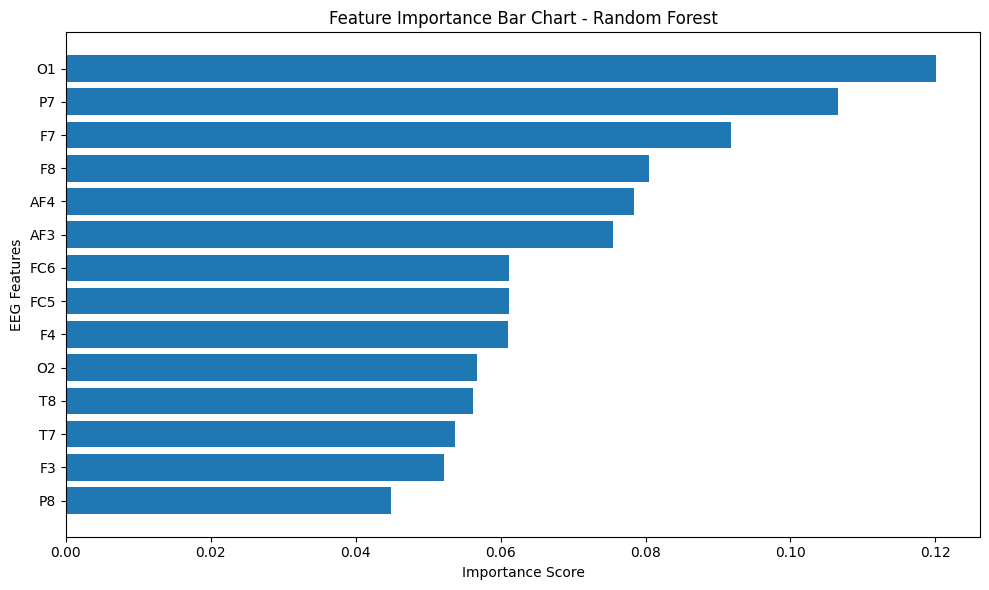

In [14]:
# Plot bar chart
plt.figure(figsize=(10, 6))
plt.barh(fi_df["Feature"], fi_df["Importance"])
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.ylabel("EEG Features")
plt.title("Feature Importance Bar Chart - Random Forest")
plt.tight_layout()
plt.show()